# EDA of the data

In [1]:
# Importing the libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing the train and test dataset.

In [2]:
train = pd.read_csv("customer_behavior_train.csv")
test = pd.read_csv("customer_behavior_test.csv")

### Data Size and sample :

In [3]:
train.shape  # Number of rows and columns in the dataset

(1800, 8)

There are 1800 data points and 7 features plus 1 target variable.

In [4]:
train.sample(5)  # Calls 5 random data points from the dataset

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
21,8.73,20.64,1,10.45,Instagram,74.93,B,1
1177,3.47,6.98,0,94.89,Direct,2.54,D,1
8,8.16,22.83,1,61.84,Google,99.59,C,0
87,1.97,4.86,1,11.77,Google,84.04,B,0
443,5.28,16.31,0,10.46,Google,95.86,D,0


### Data Info (Data Type) :

In [5]:
train.info()  # Shows the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          1800 non-null   float64
 1   Pages_viewed          1800 non-null   float64
 2   Clicked_ad            1800 non-null   int64  
 3   Cart_value            1800 non-null   float64
 4   Referral              1800 non-null   object 
 5   Browser_Refresh_Rate  1800 non-null   float64
 6   Last_Ad_Seen          1800 non-null   object 
 7   Purchase              1800 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 112.6+ KB


### Missing Values in Data :

In [6]:
train.isnull().sum()  # Checks for missing data points in the dataset

Time_on_site            0
Pages_viewed            0
Clicked_ad              0
Cart_value              0
Referral                0
Browser_Refresh_Rate    0
Last_Ad_Seen            0
Purchase                0
dtype: int64

There are no missing values

### Data Statistics :

In [7]:
train.describe()  # Shows the various stastical inforamtion of our dataset

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Purchase
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,4.962244,12.429483,0.301111,50.352933,100.662100,0.292222
std,2.336373,6.381941,0.458868,47.443390,51.645694,0.454910
min,0.500000,0.760000,0.000000,10.000000,-65.800000,0.000000
25%,3.300000,7.860000,0.000000,13.862500,65.430000,0.000000
50%,4.935000,12.020000,0.000000,34.690000,99.735000,0.000000
75%,6.610000,16.500000,1.000000,67.630000,134.755000,1.000000
max,10.000000,35.340000,1.000000,300.000000,303.400000,1.000000


### Checking for Duplicates :

In [8]:
train.duplicated().sum()  # Checks for duplicates present

np.int64(0)

There are no duplicate values present

In [9]:
train.nunique()  # To check whether a feature is categorical or numerical by checking unique values in each column

Time_on_site             739
Pages_viewed            1239
Clicked_ad                 2
Cart_value              1353
Referral                   4
Browser_Refresh_Rate    1735
Last_Ad_Seen               4
Purchase                   2
dtype: int64

There are 4 numerical columns:
1. Time_on_site           
2. Pages_viewed              
3. Cart_value
4. Browser_Refresh_Rate

And 4 Categorical colums:
1. Clicked_ad
2. Referral
3. Last_Ad_Seen               4
4. Purchase

### Checking for Correlation :

In [10]:
train.corr(numeric_only = True)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Purchase
Time_on_site,1.000000,0.906873,-0.019618,0.021560,0.011260,0.344128
Pages_viewed,0.906873,1.000000,-0.011645,0.005392,0.019562,0.358996
Clicked_ad,-0.019618,-0.011645,1.000000,0.048734,0.008641,0.283907
Cart_value,0.021560,0.005392,0.048734,1.000000,-0.042083,0.137851
Browser_Refresh_Rate,0.011260,0.019562,0.008641,-0.042083,1.000000,-0.005686
Purchase,0.344128,0.358996,0.283907,0.137851,-0.005686,1.000000


We will drop Browser_Refresh_Rate as it has a very low correlation with our target variable purchase.

### Univariate Analysis :

We have 4 Categorical Features:
1) Clicked_ad
2) Referral
3) Last_Ad_Seen
4) Purchase

In [11]:
train.shape

(1800, 8)

<Axes: xlabel='Purchase', ylabel='count'>

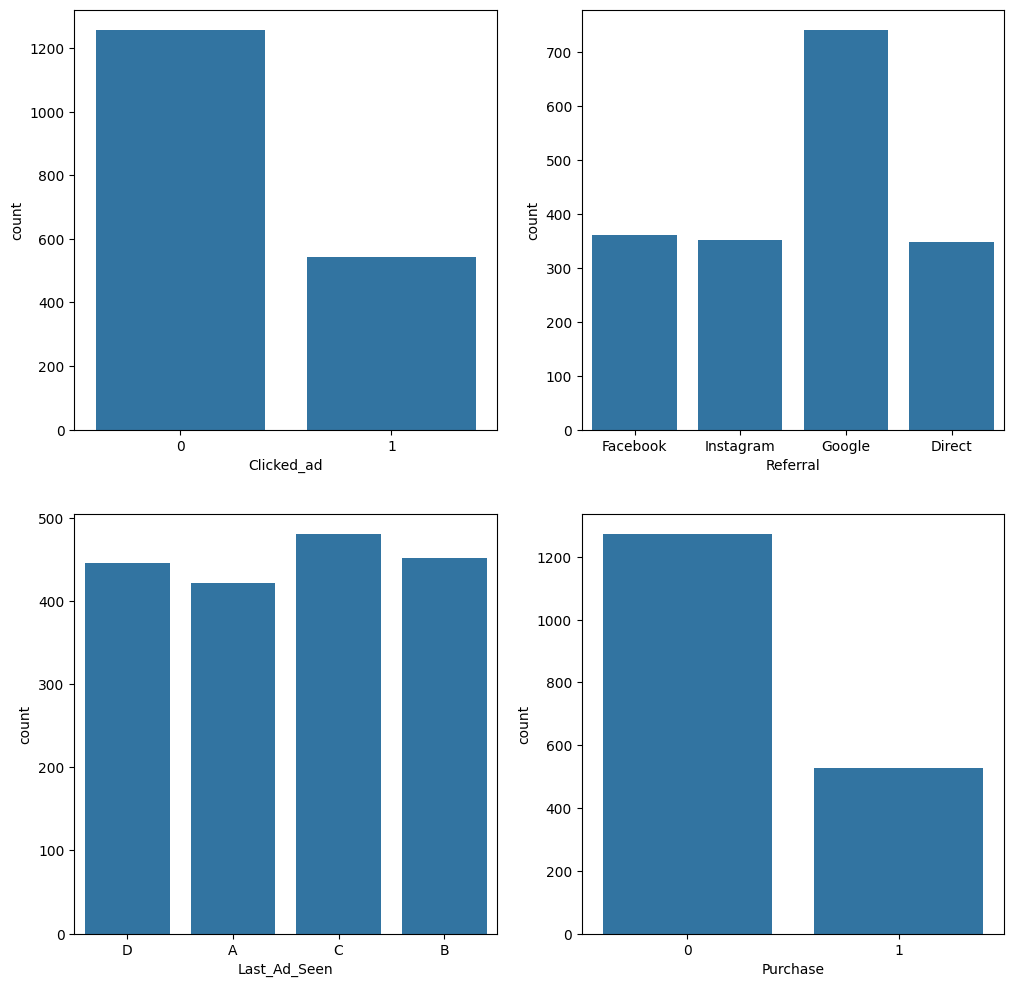

In [12]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.countplot(x='Clicked_ad', data = train)

plt.subplot(2,2,2)
sns.countplot(x='Referral', data=train)

plt.subplot(2,2,3)
sns.countplot(x='Last_Ad_Seen', data=train)

plt.subplot(2,2,4)
sns.countplot(x='Purchase', data=train)


This shows us the barplot (countplot) of the various categorical features and it is important to note that our target variable Purchase has a highly imbalanced numbers of purchases vs non-purchases.

We have 3 Numerical Features:
1) Time_on_site
2) Pages_viewed
3) Cart_value

Skew in Data is :  0.03134079668466636
Skew in Data is :  0.3756775873900903
Skew in Data is :  1.7809413944843802


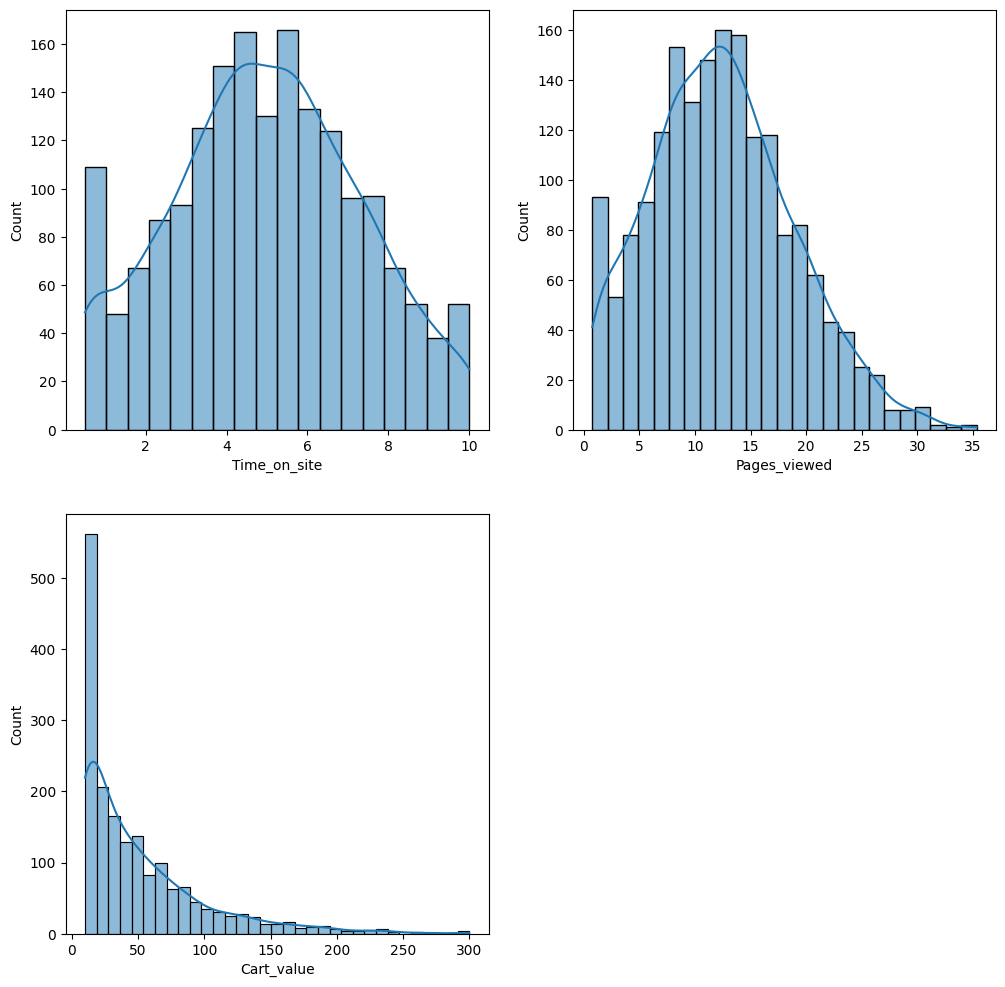

In [13]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.histplot(train['Time_on_site'], kde=True)
print("Skew in Data is : ",train['Time_on_site'].skew())

plt.subplot(2,2,2)
sns.histplot(train['Pages_viewed'], kde=True)
print("Skew in Data is : ",train['Pages_viewed'].skew())

plt.subplot(2,2,3)
sns.histplot(train['Cart_value'], kde=True)
print("Skew in Data is : ",train['Cart_value'].skew())


Since the skew in Time_on_site and Pages_viewed are less than 0.5, we dont need to normally distribute them but we need to apply gaussian transformation to Cart_value because it has a high skew (>0.5) and since its postively skewed we will apply log transformation.

But before that we have to remove outliers. We will use IQR method to remove the outliers.

<Axes: ylabel='Cart_value'>

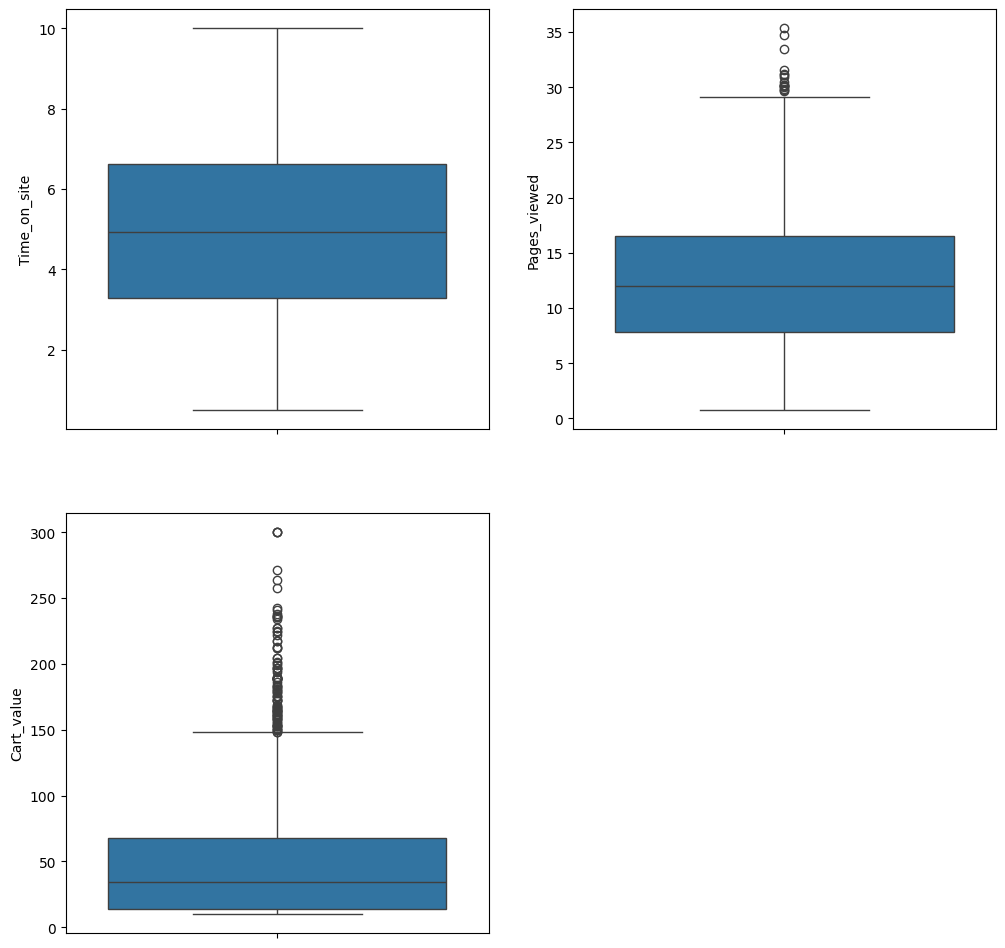

In [14]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.boxplot(train['Time_on_site'])

plt.subplot(2,2,2)
sns.boxplot(train['Pages_viewed'])

plt.subplot(2,2,3)
sns.boxplot(train['Cart_value'])

This shows us the box plot of the values of the numerical features. The points lyping outside the bounds and marked in circle are outliers.

In [15]:
print(train['Time_on_site'].describe(),"\n")
print(train['Pages_viewed'].describe(),"\n")
print(train['Cart_value'].describe())

count    1800.000000
mean        4.962244
std         2.336373
min         0.500000
25%         3.300000
50%         4.935000
75%         6.610000
max        10.000000
Name: Time_on_site, dtype: float64 

count    1800.000000
mean       12.429483
std         6.381941
min         0.760000
25%         7.860000
50%        12.020000
75%        16.500000
max        35.340000
Name: Pages_viewed, dtype: float64 

count    1800.000000
mean       50.352933
std        47.443390
min        10.000000
25%        13.862500
50%        34.690000
75%        67.630000
max       300.000000
Name: Cart_value, dtype: float64


We make a dictionary to save the outer limits of the the three numerical features

In [16]:
cols = ['Cart_value', 'Time_on_site', 'Pages_viewed']  # list for our numerical columns
outlier_limits = {}  # dictionary for our outlier bounds

for col in cols :  # for loop will run for all the numerical columns in our list
    p25 = train[col].quantile(0.25)
    p75 = train[col].quantile(0.75)
    iqr = p75 - p25
    up_lim = p75 + (1.5 * iqr)
    low_lim = p25 - (1.5 * iqr)
    outlier_limits[col] = {'lower': low_lim, 'upper': up_lim}  # the limits are saved here

Now we remove the outliers i.e. anything below the lower limit and anything above the upper limit we foundusing IQR Method.

In [17]:
train = train[train['Cart_value'] < outlier_limits['Cart_value']['upper']]
train = train[train['Cart_value'] > outlier_limits['Cart_value']['lower']]

train = train[train['Time_on_site'] < outlier_limits['Time_on_site']['upper']]
train = train[train['Time_on_site'] > outlier_limits['Time_on_site']['lower']]

train = train[train['Pages_viewed'] < outlier_limits['Pages_viewed']['upper']]
train = train[train['Pages_viewed'] > outlier_limits['Pages_viewed']['lower']]

In [18]:
train.shape

(1690, 8)

110 data points have been removed as outliers.

Skew in Data is :  0.025614671765202386
Skew in Data is :  0.24692519211771288
Skew in Data is :  1.0926296715418458


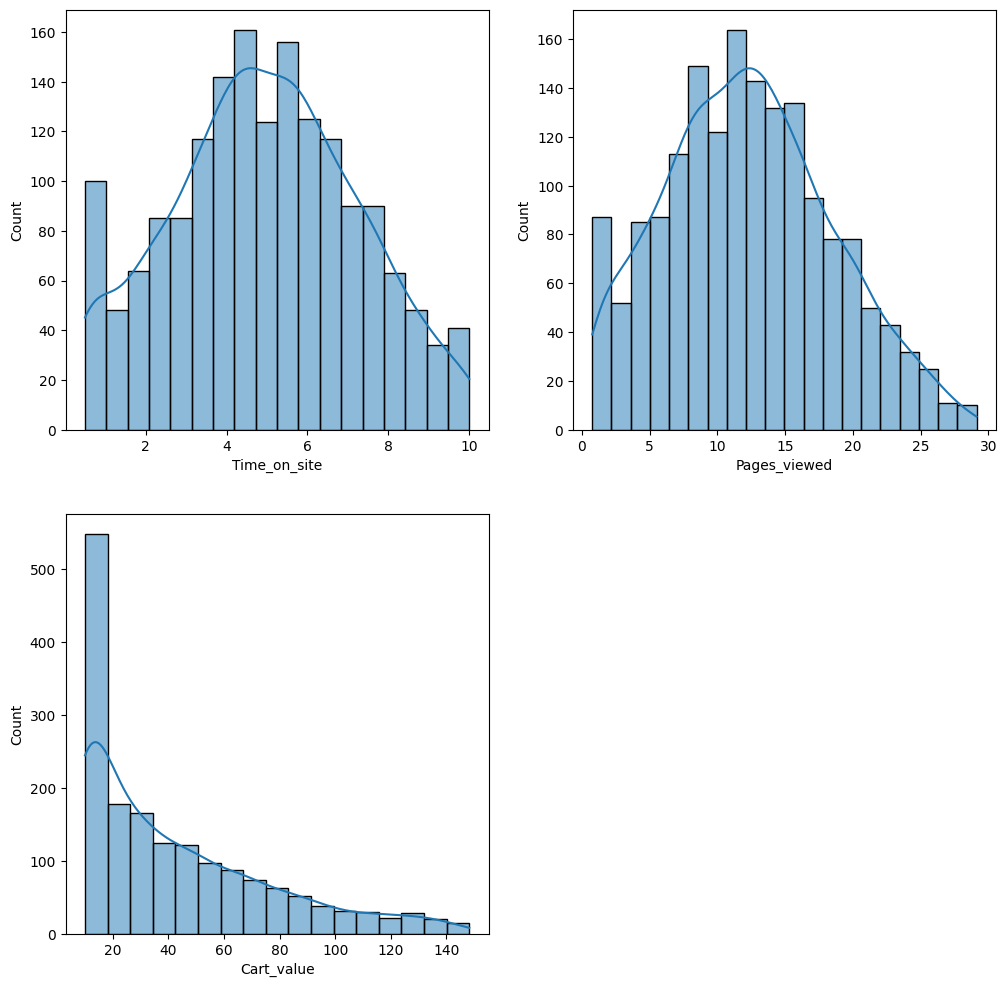

In [19]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.histplot(train['Time_on_site'], kde=True)
print("Skew in Data is : ",train['Time_on_site'].skew())

plt.subplot(2,2,2)
sns.histplot(train['Pages_viewed'], kde=True)
print("Skew in Data is : ",train['Pages_viewed'].skew())

plt.subplot(2,2,3)
sns.histplot(train['Cart_value'], kde=True)
print("Skew in Data is : ",train['Cart_value'].skew())


The outliers have been removed from the above histograms. Now we normally distribute the data of Cart_value.

In [20]:
from sklearn.preprocessing import FunctionTransformer # for our log transformation

trft = FunctionTransformer(func=np.log)

In [21]:
traincpy = train.copy()
traincpy['Cart_value'] = trft.transform(train['Cart_value'])

Skew in Data is :  0.041586566632631744


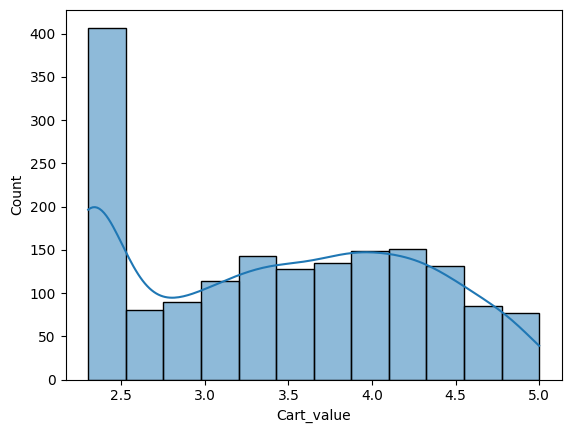

In [22]:
sns.histplot(traincpy['Cart_value'], kde=True)
print("Skew in Data is : ",traincpy['Cart_value'].skew())

The skew is reduced to 0.04. Here we have implemented log transformation on a copy of our data just for visualization. Later we will write the same code to apply on the actual dataset.

### Bivariate Analysis :

Bivariate analysis of the numerical features using scatterplots:

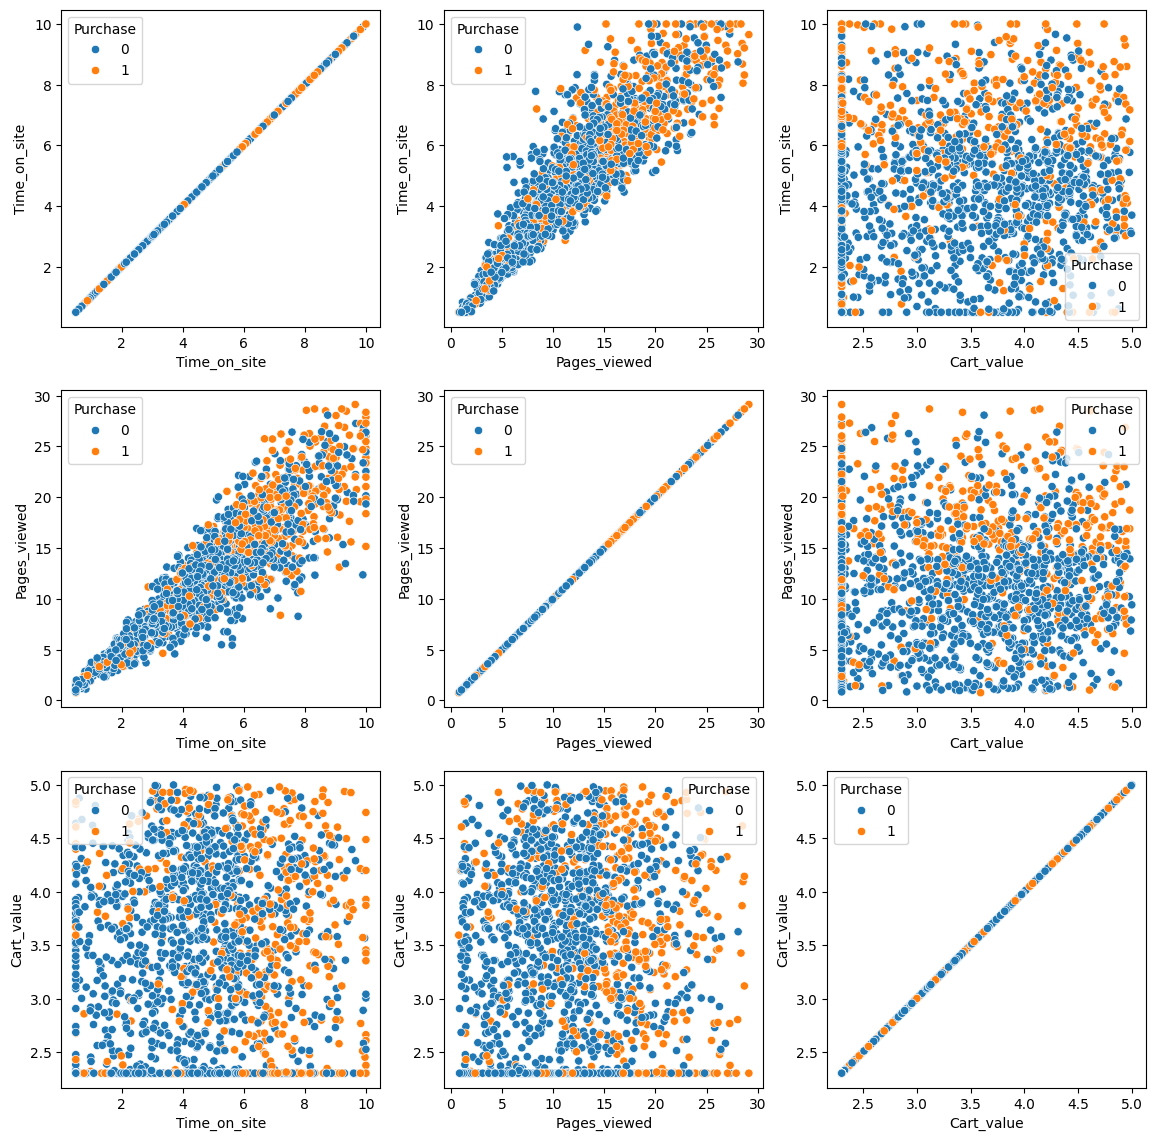

In [23]:
plt.figure(figsize=(14,14))

colums = ['Time_on_site', 'Pages_viewed', 'Cart_value']

for i, x in enumerate(colums) :
    if i > 2 :
        break
    for j, y in enumerate(colums) :
        if j > 2 :
            break
        plt.subplot(3,3,(j * 3) + i + 1)
        sns.scatterplot(data = traincpy, x = x, y = y, hue = 'Purchase')  # traincpy is used instead of train.


These scatterplots show the relationship between different numerical features after the log transformation on Cart_value.

Notice that Time_on_site and Pages_viewed show a linear relation due to high correlation of 0.906, hence for logistic regression model we will omit one column to avoid multicollinearity.

Bivariate analysis of the Categorical Features using heatmaps:

<Axes: xlabel='Purchase', ylabel='Last_Ad_Seen'>

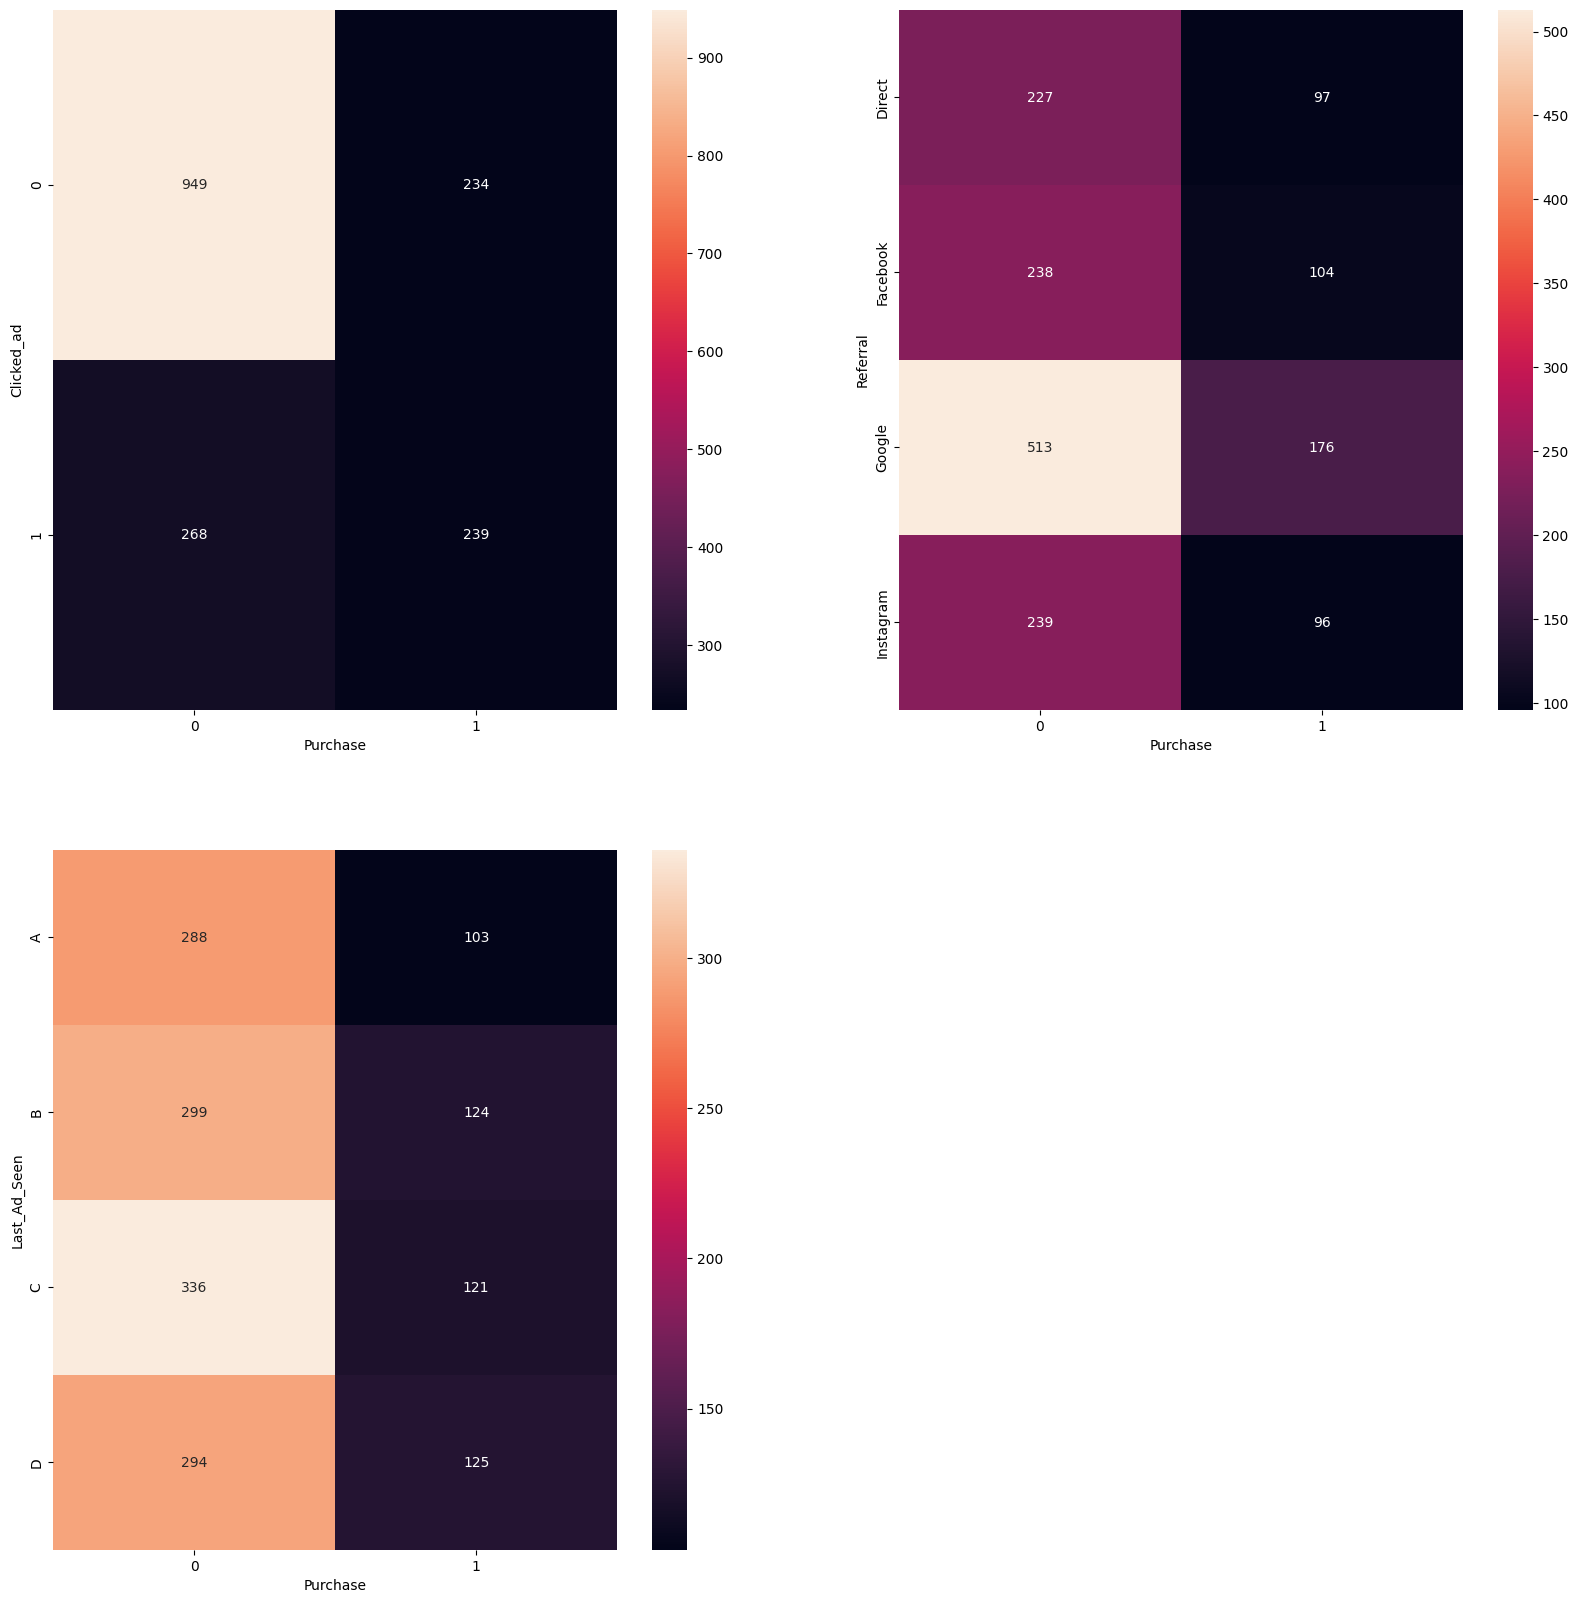

In [24]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.heatmap(pd.crosstab(train['Clicked_ad'], train['Purchase']), annot = True, fmt = 'd')

plt.subplot(2,2,2)
sns.heatmap(pd.crosstab(train['Referral'], train['Purchase']), annot = True, fmt = 'd')

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(train['Last_Ad_Seen'], train['Purchase']), annot = True, fmt = 'd')


# Creating Pipeline

We create a pipeline to train two different models:
1. Logistic Regression
2. Random Forest

In [25]:
# From various modules we import necessary functions

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


First dropping Browser_Refresh_Rate (negligible correlation with Target Purchase) and Pages_viewed to avoid multicollinearity. Then splitting the train and test data between features and target.

In [26]:
train.drop(columns=['Browser_Refresh_Rate', 'Pages_viewed'], inplace = True)

In [27]:
train.sample(5)

,Time_on_site,Clicked_ad,Cart_value,Referral,Last_Ad_Seen,Purchase
426,5.31,0,94.50,Instagram,A,0
777,5.32,1,31.22,Google,C,1
1349,3.36,0,10.00,Facebook,A,0
727,6.87,0,10.00,Instagram,A,0
249,5.91,1,10.00,Google,B,1


In [28]:
test.drop(columns=['Browser_Refresh_Rate', 'Pages_viewed'], inplace = True)

In [29]:
test.sample(5)

,Time_on_site,Clicked_ad,Cart_value,Referral,Last_Ad_Seen,Purchase
386,6.62,0,48.38,Facebook,B,0
321,1.16,0,41.73,Facebook,B,0
8,4.14,0,10.00,Google,A,0
109,4.82,0,23.40,Google,C,0
69,9.53,1,83.23,Direct,A,1


In [30]:
X_train = train.drop('Purchase', axis = 1)
y_train = train['Purchase']

X_test = test.drop('Purchase', axis = 1)
y_test = test['Purchase']

The irrelevant columns have been dropped, now we will make a column transformation named preprocessor which will do the job of feature engineering for our two pipelines pipe_lr (for logistic regression) and pipe_rf (for random forest)

In [31]:
categorical_cols = ['Clicked_ad', 'Referral', 'Last_Ad_Seen']
log_cols = ['Cart_value']  # Cart_value will be normally distributed here
numeric_cols = ['Time_on_site', 'Cart_value']  # Cart_value log will override this

# ColumnTransformer will take place
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore'), categorical_cols),
    ('log_cart', FunctionTransformer(np.log, feature_names_out = 'one-to-one'), log_cols),
    ('scale', StandardScaler(), numeric_cols)
], remainder = 'passthrough', force_int_remainder_cols=False)

In preprocessor, we include:
1. OneHotEncoder() for our categorical columns. We drop the first row as it is just extra information and to avoid multicollinearity for our logistic regression model as only n-1 columns are required for a categorical feature containg n options.
2. FunctionTransformer(np.log) is used on Cart_value to normalize its distribution for better data interpretetion.
3. StandardScaler() is used to bring down all the values of the numerical columns to a similar range or scale.

# Training the Model

### Logistic Regression:

In [32]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression())

In [33]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Clicked_ad', 'Referral',
                                                   'Last_Ad_Seen']),
                                                 ('log_cart',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>),
                                                  ['Cart_value']),
                                                 ('scale', StandardScaler(),
                                                  ['Time_on_site',
                                                   'Cart_value'])])),
                ('logisticregression', LogisticRegression())])

In [34]:
y_pred_lr = pipe_lr.predict(X_test)

In [35]:
print("Confusion Matrix using Logistic Regression is:\n", confusion_matrix(y_test, y_pred_lr), "\n")
print("Accuracy score using Logistic Regression:\n", accuracy_score(y_test, y_pred_lr), "\n")
print("F1 Score using Logistic Regression:\n", f1_score(y_test, y_pred_lr ,average = 'weighted'))

# note that F1 score is used with average = 'weighted' parameter as there is an imbalance in the Purchase column

Confusion Matrix using Logistic Regression is:
 [[281  33]
 [ 62  74]] 

Accuracy score using Logistic Regression:
 0.7888888888888889 

F1 Score using Logistic Regression:
 0.7809509492580691


### Random Forest:

In [36]:
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier())

In [37]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Clicked_ad', 'Referral',
                                                   'Last_Ad_Seen']),
                                                 ('log_cart',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>),
                                                  ['Cart_value']),
                                                 ('scale', StandardScaler(),
                                                  ['Time_on_site',
                                                   'Cart_value'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [38]:
y_pred_rf = pipe_rf.predict(X_test)

In [39]:
print("Confusion Matrix using Random Forest is:\n", confusion_matrix(y_test, y_pred_rf), "\n")
print("Accuracy score using Random Forest:\n", accuracy_score(y_test, y_pred_rf), "\n")
print("F1 Score using Random Forest:\n", f1_score(y_test, y_pred_rf, average = 'weighted'))

Confusion Matrix using Random Forest is:
 [[264  50]
 [ 62  74]] 

Accuracy score using Random Forest:
 0.7511111111111111 

F1 Score using Random Forest:
 0.7477008547008547


# Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV


### For Logistic Regression:

In [41]:
param_grid_lr = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['elasticnet'],
    'logisticregression__solver': ['saga'],
    'logisticregression__l1_ratio': [0.1, 0.5, 0.9],
    'logisticregression__max_iter': [100, 200]
}

In [42]:
grid_search_lr = GridSearchCV(
    estimator = pipe_lr,
    param_grid = param_grid_lr,
    cv=5,
    scoring = 'f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_search_lr.fit(X_train, y_train)

print("Best Parameters:\n", grid_search_lr.best_params_,"\n")
print("Best Weighted F1 Score:\n", grid_search_lr.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
 {'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'} 

Best Weighted F1 Score:
 0.7345557261325355


### For Random Forest:

In [43]:
param_grid_rf = {
    'randomforestclassifier__max_depth': [2, 5, 10, 15],
    'randomforestclassifier__n_estimators': [100, 300, 500],
    'randomforestclassifier__min_samples_split': [2, 5],
}

In [44]:
grid_search_rf = GridSearchCV(
    estimator = pipe_rf,
    param_grid = param_grid_rf,
    cv=5,
    scoring = 'f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters:\n", grid_search_rf.best_params_,"\n")
print("Best Weighted F1 Score:\n", grid_search_rf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 500} 

Best Weighted F1 Score:
 0.7253918868740488
